In [8]:
##
# Sanity check for the experiment-wide effect of fragment-GC bias correction
##
%matplotlib inline
import sklearn
import csv
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import math
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot

In [9]:
df_salmon = pd.read_table("GEUVADIS_salmon.tsv")
df_kallisto = pd.read_table("GEUVADIS_kallisto.tsv")
df_meta = pd.read_table("meta.tsv")

In [10]:
features_raw_salmon = []
features_raw_kallisto = []
pops = []
labs = []
samples = list(df_meta['sample'])
for s in samples:
    features_raw_salmon.append(list(df_salmon[s]))
    features_raw_kallisto.append(list(df_kallisto[s]))
    pops.append(df_meta.loc[df_meta['sample'] == s]['population'].values[0])
    labs.append(df_meta.loc[df_meta['sample'] == s]['labs'].values[0])

In [11]:
features_sal = np.log2(np.array(features_raw_salmon)+1)
features_kal = np.log2(np.array(features_raw_kallisto)+1)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
sal = pipeline.fit_transform(features_sal)
kal = pipeline.fit_transform(features_kal)

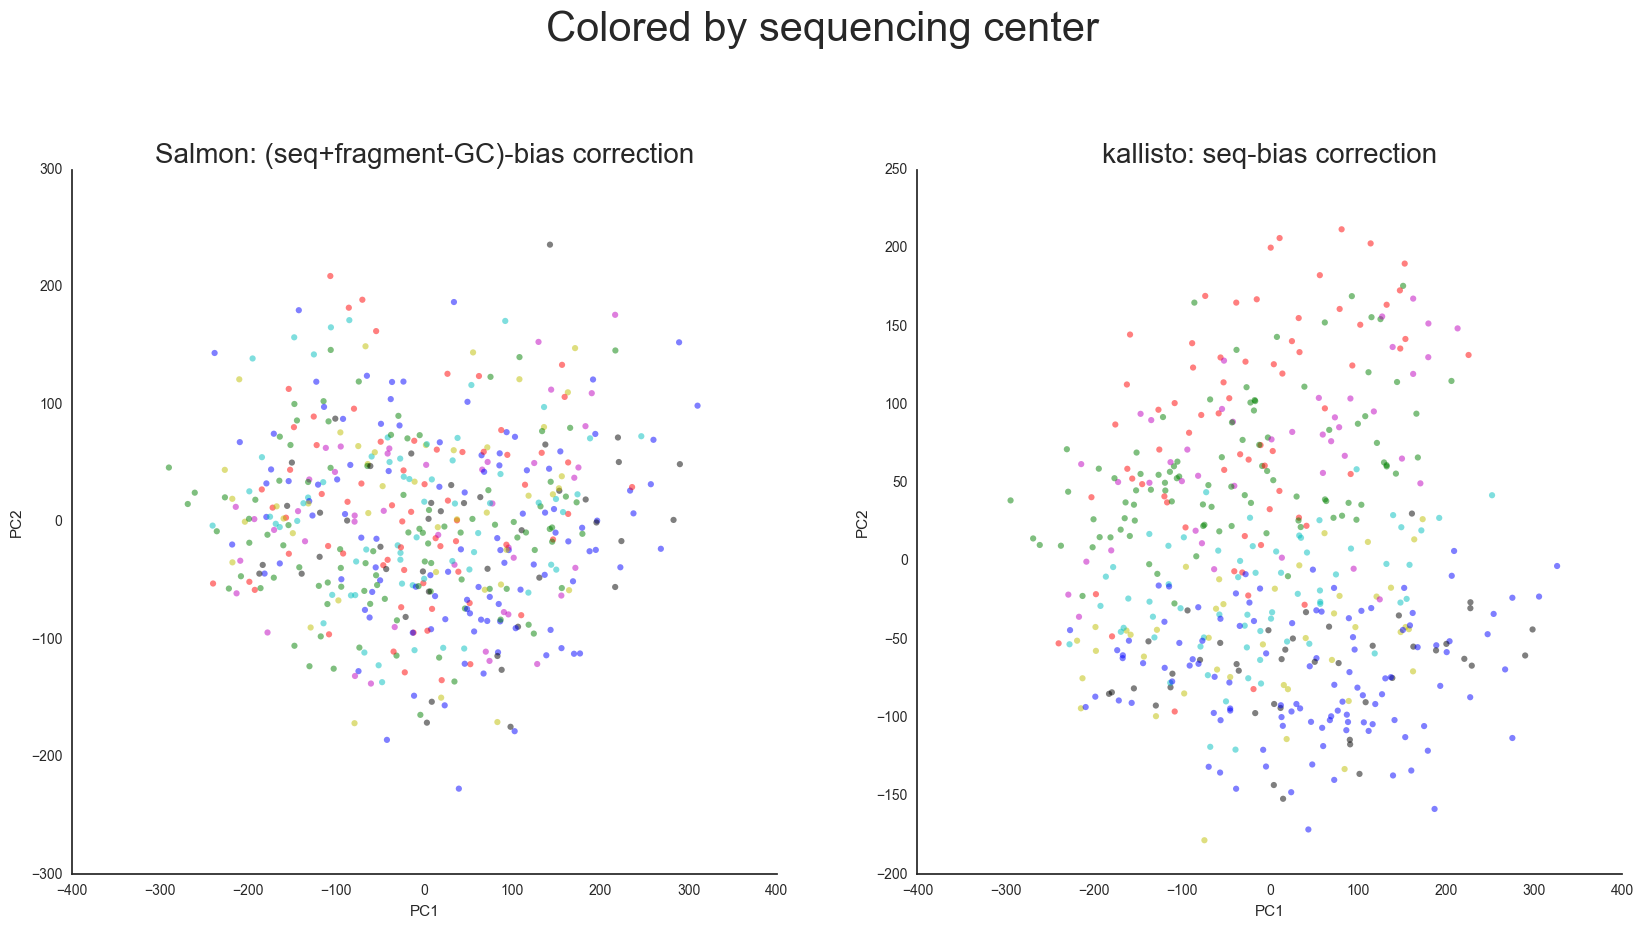

In [13]:
sns.set_style('white')
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

fig.suptitle('Colored by sequencing center',fontsize=30)

sub1 = fig.add_subplot(2,2,1) #first subplot
sub2 = fig.add_subplot(2,2,2)

sub1.set_title('Salmon: (seq+fragment-GC)-bias correction', fontsize=20) 
sub2.set_title('kallisto: seq-bias correction', fontsize=20)

sub1.set_xlabel('PC1')
sub1.set_ylabel('PC2')

sub2.set_xlabel('PC1')
sub2.set_ylabel('PC2')


colors = ['b','g','r','c','m','y','k']
labcols = [colors[int(x-1)] for x in labs]
sub1.scatter(sal[:,0], sal[:,1], c=labcols, alpha=0.5, edgecolors='none')
sub2.scatter(kal[:,0], kal[:,1], c=labcols, alpha=0.5, edgecolors='none')
sns.despine()
plt.show()